# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [3]:
df = pd.read_csv('CHURN_TELECON_MOD08_TAREFA_PART2.csv', delimiter=',')

df.head(10)

,ClienteID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonia,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,female,0,Yes,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,29.850000,29.85,0
1,5575-GNVDE,male,0,No,No,34,Yes,dsl,Yes,No,No,One year,Mailed check,56.950000,1889.50,0
2,3668-QPYBK,male,0,No,No,2,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,1
3,7795-CFOCW,male,0,No,No,45,No,dsl,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,0
4,8191-XWSZG,female,0,No,No,52,Yes,no,No,No,No,One year,Mailed check,65.607563,1022.95,0
5,9959-WOFKT,male,0,No,Yes,71,Yes,fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),65.607563,7382.25,0
6,4190-MFLUW,female,0,Yes,Yes,10,Yes,dsl,No,Yes,No,Month-to-month,Credit card (automatic),65.607563,528.35,1
7,4183-MYFRB,female,0,No,No,21,Yes,fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,1862.90,0
8,8779-QRDMV,male,1,No,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,65.607563,39.65,1
9,1680-VDCWW,male,0,Yes,No,12,Yes,no,No,No,No,One year,Bank transfer (automatic),65.607563,202.25,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

# A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

In [4]:
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178,0.260048
std,0.368135,24.636885,27.984700,2264.585643,0.438749
min,0.000000,0.000000,18.400000,18.800000,0.000000
25%,0.000000,8.000000,45.400000,402.337500,0.000000
50%,0.000000,29.000000,65.607563,1402.900000,0.000000
75%,0.000000,56.000000,87.712500,3867.162500,1.000000
max,1.000000,72.000000,118.650000,8564.750000,1.000000


### Pelo describre já podemos imaginar o seguinte:  
- Tempo como cliente: mais de 50% de nossos clientes estão a 29 meses conosco e 25% estão a mais de 56 meses
- Pagamento Mensal: A media e mediana estão bem proximas podemos concluir que seja uma variavel com distribuição normal.
- Total pago: Nessa variavel temos um desvio bem acentuado possivelmente há a outliers, a media e mediana estão disotanado bastante.

# B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

## Sim, Tempo como cliente e Total 

# C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

In [5]:
df.columns

Index(['ClienteID', 'Genero', 'Idoso', 'Casado', 'Dependentes',
       'Tempo_como_Cliente', 'Servico_Telefonia', 'Servico_Internet',
       'Servico_Seguranca', 'Suporte_Tecnico', 'StreamingTV', 'Tipo_Contrato',
       'Metodo_Pagamento', 'Pagamento_Mensal', 'Total_Pago', 'Churn'],
      dtype='object')

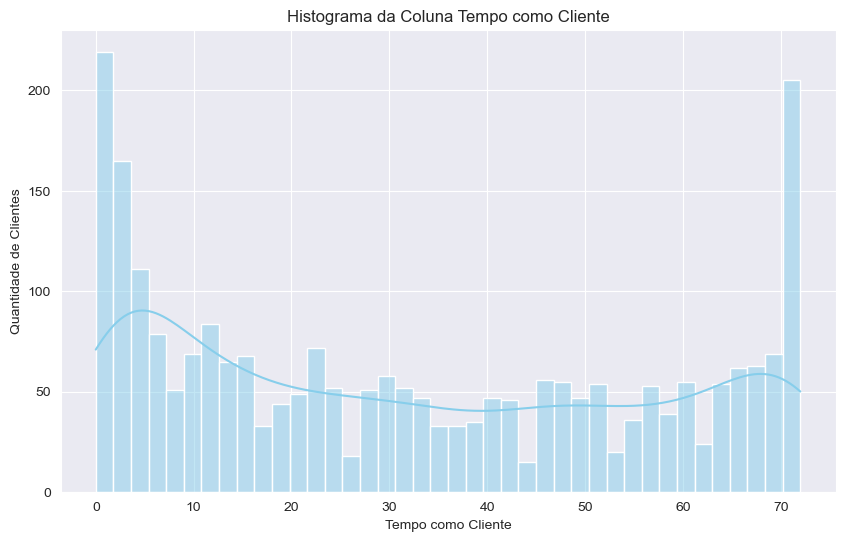

In [23]:
sns.set_style('darkgrid')

# histograma do pagamento mensal para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tempo_como_Cliente', bins=40, kde=True, color='skyblue')
plt.title('Histograma da Coluna Tempo como Cliente')
plt.xlabel('Tempo como Cliente')
plt.ylabel('Quantidade de Clientes')
plt.show()

In [25]:
(df['Tempo_como_Cliente'] <= 12).sum()

778

In [26]:
(df['Tempo_como_Cliente'] <= 12).mean() * 100

31.270096463022508

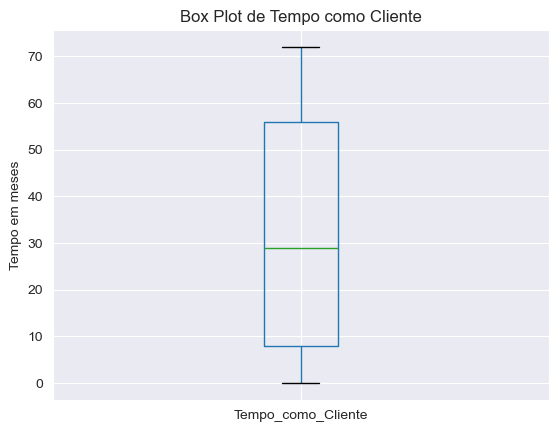

In [29]:
df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot de Tempo como Cliente')
plt.ylabel('Tempo em meses')
plt.show()

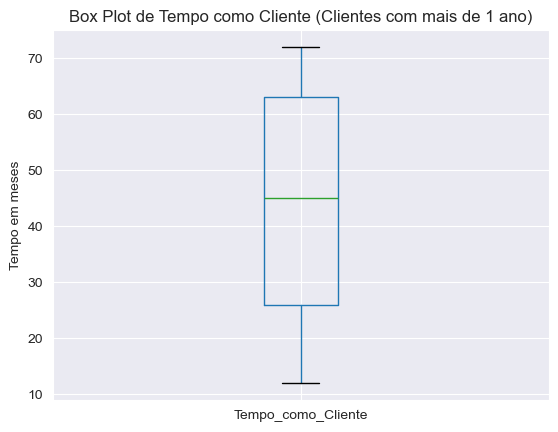

In [34]:
df_mais_de_um = df[df['Tempo_como_Cliente'] >= 12]
df_mais_de_um.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot de Tempo como Cliente (Clientes com mais de 1 ano)')
plt.ylabel('Tempo em meses')
plt.show()

### Como haviam muitos clientes (31% da base) com menos de 1 ano, verifiquei como seria a distribuição dos dados sem eles, afim de avaliar a existência de outliers

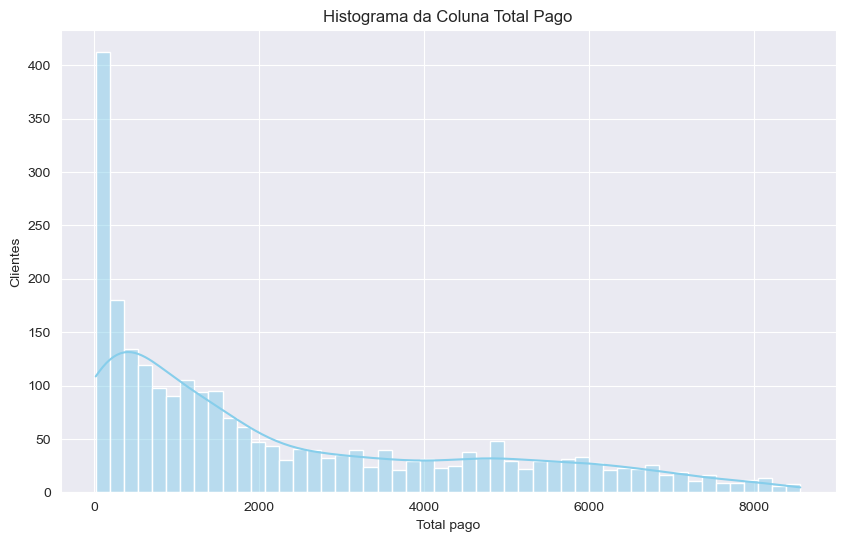

In [38]:
sns.set_style('darkgrid')

# histograma do total pago para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total_Pago', bins=50, kde=True, color='skyblue')
plt.title('Histograma da Coluna Total Pago')
plt.xlabel('Total pago')
plt.ylabel('Clientes')
plt.show()

### E é claro que o total pago é diretamente proporcional ao tempo como cliente, aqui podemos ver que novamente quanto menos tempo como cliente menor o valor pago pelo cliente.

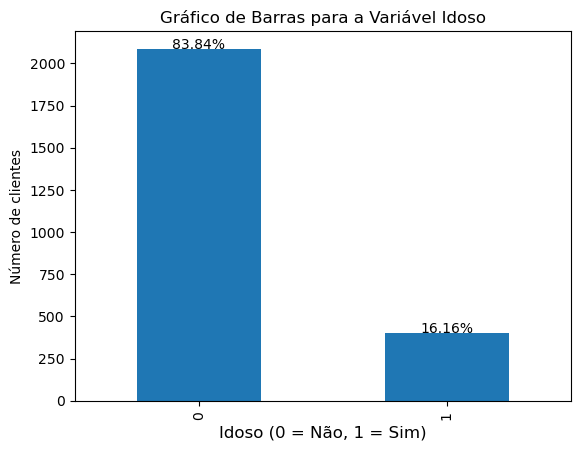

In [13]:
contagem_idoso = df['Idoso'].value_counts()
ax = contagem_idoso.plot(kind='bar')

porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100
for i, v in enumerate(contagem_idoso):
    ax.text(i, v + 1, f'{porcentagem_idoso[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de clientes')

plt.show()

### A maioria de nossos clientes não são idosos, pode exister alguma relação ao churn.

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\4218462070.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_suporte[i]:.2f}%', ha='center')


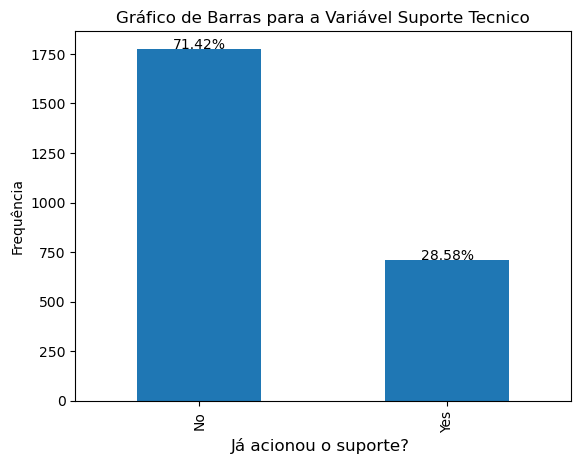

In [ ]:
contagem_suporte = df['Suporte_Tecnico'].value_counts()
ax = contagem_suporte.plot(kind='bar')

porcentagem_suporte = (contagem_suporte / contagem_suporte.sum()) * 100
for i, v in enumerate(contagem_suporte):
    ax.text(i, v + 1, f'{porcentagem_suporte[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Suporte Tecnico')
plt.xlabel('Já acionou o suporte? ', fontsize=12)
plt.ylabel('Número de clientes')

plt.show()

### 71% de nossos clientes nunca acionaram o suporte, clientes que já acionaram o suporte podem serem mais propensos a churn

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\1990488804.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_contrato[i]:.2f}%', ha='center')


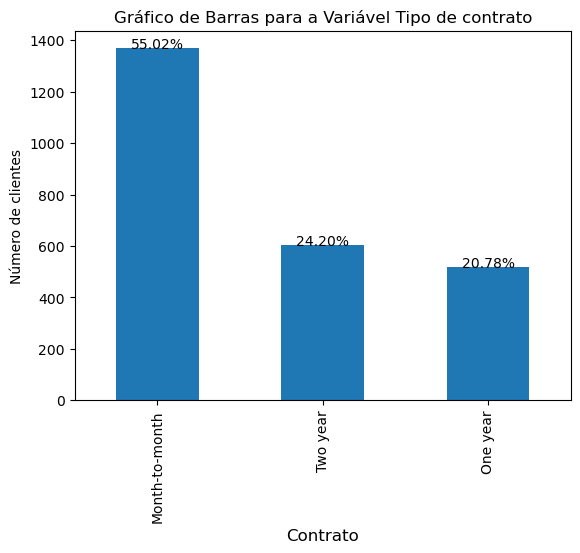

In [15]:
contagem_contrato = df['Tipo_Contrato'].value_counts()
ax = contagem_contrato.plot(kind='bar')

porcentagem_contrato = (contagem_contrato / contagem_contrato.sum()) * 100
for i, v in enumerate(contagem_contrato):
    ax.text(i, v + 1, f'{porcentagem_contrato[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Tipo de contrato')
plt.xlabel('Contrato', fontsize=12)
plt.ylabel('Número de clientes')

plt.show()

### Aqui vemos que a maioria de nossos clientes possuem contratos mensais, indicando que talvez sejam propensos churn.

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\1954930527.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_servico[i]:.2f}%', ha='center')


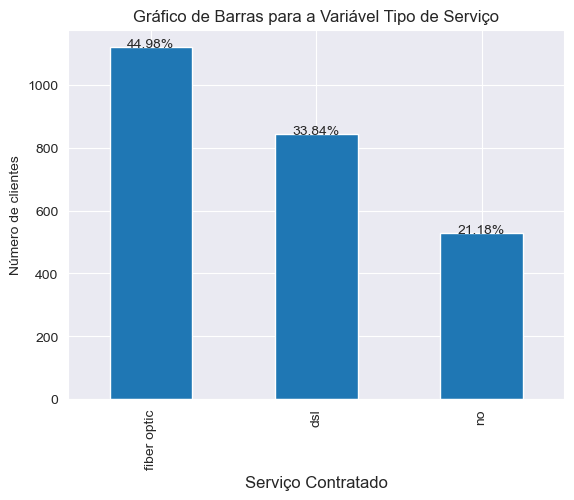

In [18]:
contagem_servico = df['Servico_Internet'].value_counts()
ax = contagem_servico.plot(kind='bar')

porcentagem_servico= (contagem_servico / contagem_servico.sum()) * 100
for i, v in enumerate(contagem_servico):
    ax.text(i, v + 1, f'{porcentagem_servico[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Tipo de Serviço')
plt.xlabel('Serviço Contratado', fontsize=12)
plt.ylabel('Número de clientes')

plt.show()

### 44% da base utiliza fibra ótica que é um serviço mais confiavel que dsl, oque pode nos fazer imaginar que a uma possivel relação entre churn e o serviço dsl 

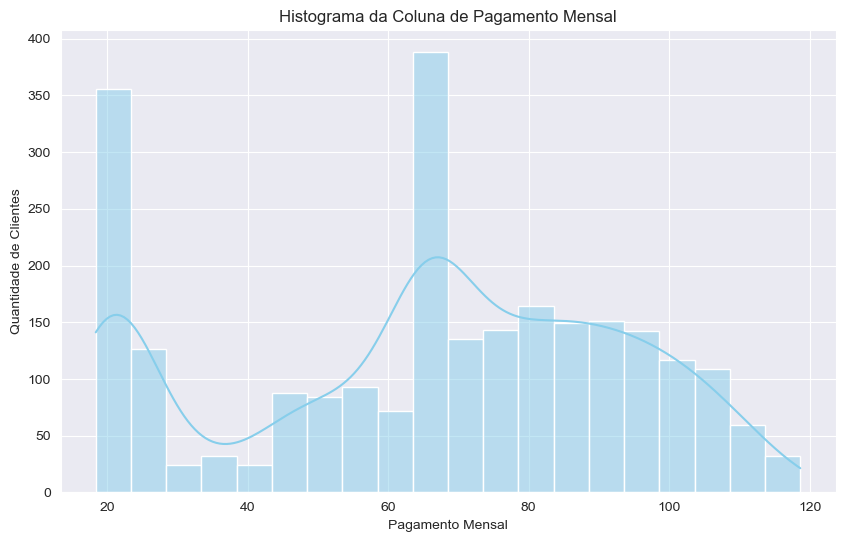

In [16]:
sns.set_style('darkgrid')

# histograma do pagamento mensal para analisarmos a distribuição dos dados
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Pagamento_Mensal', bins=20, kde=True, color='skyblue')
plt.title('Histograma da Coluna de Pagamento Mensal')
plt.xlabel('Pagamento Mensal')
plt.ylabel('Quantidade de Clientes')
plt.show()

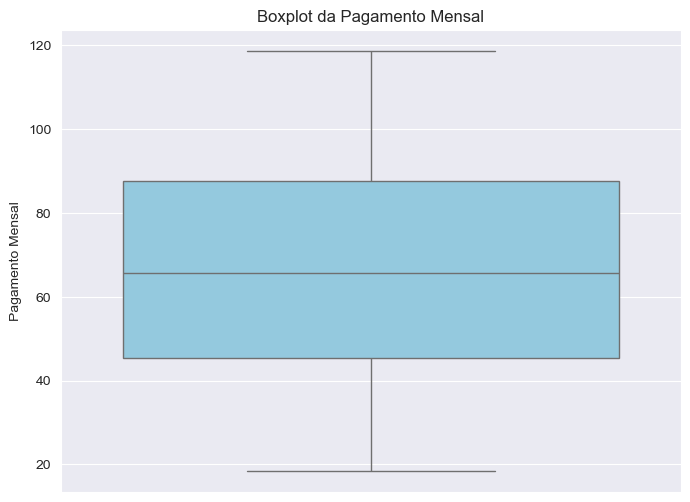

In [17]:
sns.set_style('darkgrid')

# boxplot da coluna de pagamento
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Pagamento Mensal')
plt.ylabel('Pagamento Mensal')
plt.show()

### Como eu havia imaginado a distribuição do valor de pagamento mensal que remete ao plano do cliente esta bem distribuida.

# D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

In [39]:
df.head(10)

,ClienteID,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonia,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,female,0,Yes,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,29.850000,29.85,0
1,5575-GNVDE,male,0,No,No,34,Yes,dsl,Yes,No,No,One year,Mailed check,56.950000,1889.50,0
2,3668-QPYBK,male,0,No,No,2,Yes,dsl,Yes,No,No,Month-to-month,Mailed check,53.850000,108.15,1
3,7795-CFOCW,male,0,No,No,45,No,dsl,Yes,Yes,No,One year,Bank transfer (automatic),65.607563,1840.75,0
4,8191-XWSZG,female,0,No,No,52,Yes,no,No,No,No,One year,Mailed check,65.607563,1022.95,0
5,9959-WOFKT,male,0,No,Yes,71,Yes,fiber optic,Yes,No,Yes,Two year,Bank transfer (automatic),65.607563,7382.25,0
6,4190-MFLUW,female,0,Yes,Yes,10,Yes,dsl,No,Yes,No,Month-to-month,Credit card (automatic),65.607563,528.35,1
7,4183-MYFRB,female,0,No,No,21,Yes,fiber optic,No,No,No,Month-to-month,Electronic check,65.607563,1862.90,0
8,8779-QRDMV,male,1,No,No,1,No,dsl,No,No,No,Month-to-month,Electronic check,65.607563,39.65,1
9,1680-VDCWW,male,0,Yes,No,12,Yes,no,No,No,No,One year,Bank transfer (automatic),65.607563,202.25,0


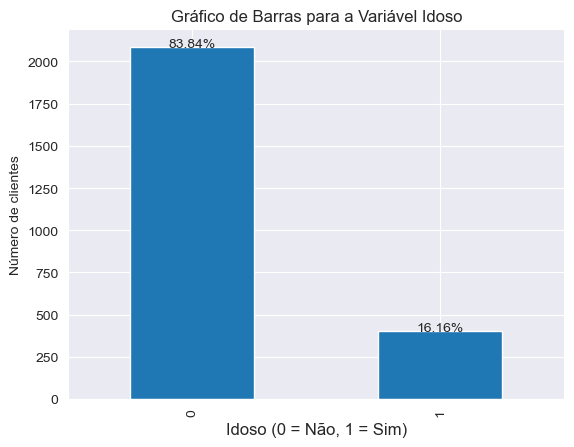

In [40]:
contagem_idoso = df['Idoso'].value_counts()
ax = contagem_idoso.plot(kind='bar')

porcentagem_idoso = (contagem_idoso / contagem_idoso.sum()) * 100
for i, v in enumerate(contagem_idoso):
    ax.text(i, v + 1, f'{porcentagem_idoso[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Idoso')
plt.xlabel('Idoso (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Número de clientes')

plt.show()

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\2959496379.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_dependentes[i]:.2f}%', ha='center')


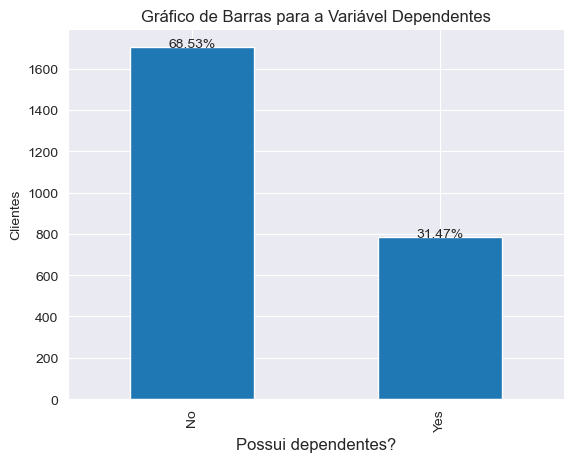

In [45]:
contagem_dependentes = df['Dependentes'].value_counts()
ax = contagem_dependentes.plot(kind='bar')

porcentagem_dependentes = (contagem_dependentes / contagem_dependentes.sum()) * 100
for i, v in enumerate(contagem_dependentes):
    ax.text(i, v + 1, f'{porcentagem_dependentes[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Dependentes')
plt.xlabel('Possui dependentes?', fontsize=12)
plt.ylabel('Clientes')

plt.show()

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\2488409268.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_telefonia[i]:.2f}%', ha='center')


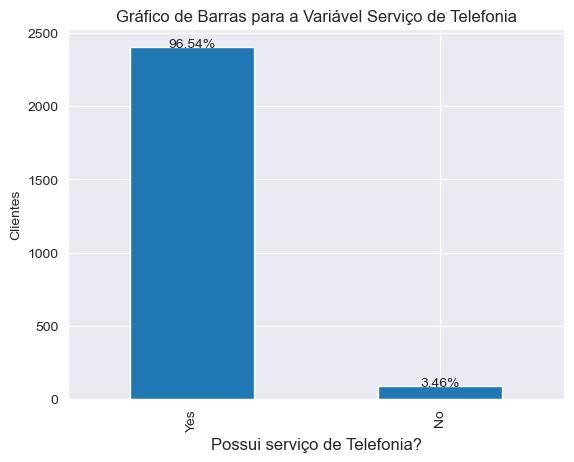

In [46]:
contagem_telefonia = df['Servico_Telefonia'].value_counts()
ax = contagem_telefonia.plot(kind='bar')

porcentagem_telefonia = (contagem_telefonia / contagem_telefonia.sum()) * 100
for i, v in enumerate(contagem_telefonia):
    ax.text(i, v + 1, f'{porcentagem_telefonia[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Serviço de Telefonia')
plt.xlabel('Possui serviço de Telefonia?', fontsize=12)
plt.ylabel('Clientes')

plt.show()

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\1550425028.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_seguranca[i]:.2f}%', ha='center')


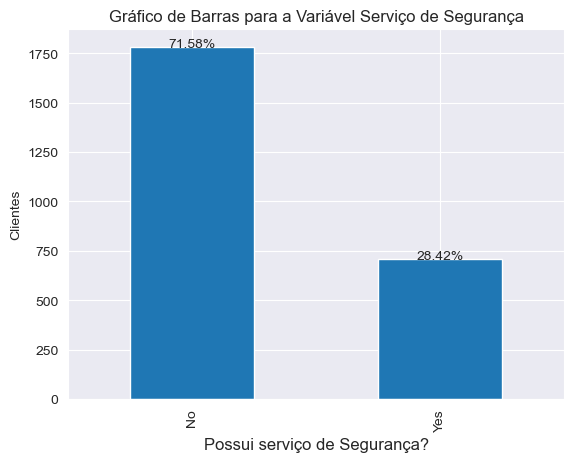

In [47]:
contagem_seguranca = df['Servico_Seguranca'].value_counts()
ax = contagem_seguranca.plot(kind='bar')

porcentagem_seguranca = (contagem_seguranca / contagem_seguranca.sum()) * 100
for i, v in enumerate(contagem_seguranca):
    ax.text(i, v + 1, f'{porcentagem_seguranca[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Serviço de Segurança')
plt.xlabel('Possui serviço de Segurança?', fontsize=12)
plt.ylabel('Clientes')

plt.show()

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\3376936056.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_sup_tec[i]:.2f}%', ha='center')


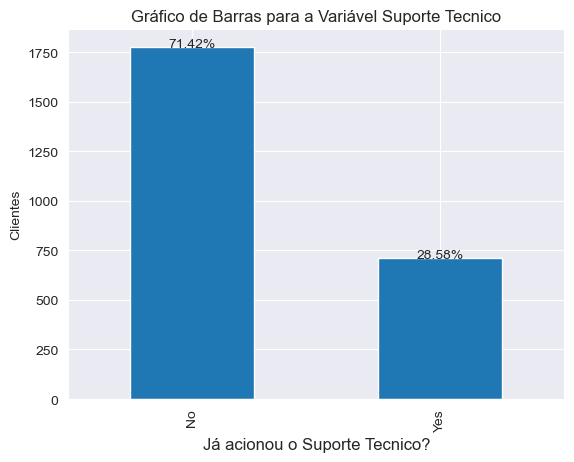

In [48]:
contagem_sup_tec = df['Suporte_Tecnico'].value_counts()
ax = contagem_sup_tec.plot(kind='bar')

porcentagem_sup_tec = (contagem_sup_tec / contagem_sup_tec.sum()) * 100
for i, v in enumerate(contagem_sup_tec):
    ax.text(i, v + 1, f'{porcentagem_sup_tec[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Suporte Tecnico')
plt.xlabel('Já acionou o Suporte Tecnico?', fontsize=12)
plt.ylabel('Clientes')

plt.show()

C:\Users\emers\AppData\Local\Temp\ipykernel_19584\1307079451.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(i, v + 1, f'{porcentagem_stream[i]:.2f}%', ha='center')


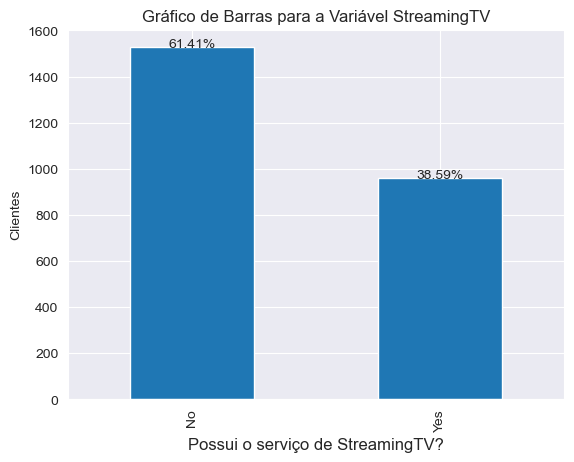

In [50]:
contagem_stream = df['StreamingTV'].value_counts()
ax = contagem_stream.plot(kind='bar')

porcentagem_stream = (contagem_stream / contagem_stream.sum()) * 100
for i, v in enumerate(contagem_stream):
    ax.text(i, v + 1, f'{porcentagem_stream[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável StreamingTV')
plt.xlabel('Possui o serviço de StreamingTV?', fontsize=12)
plt.ylabel('Clientes')

plt.show()

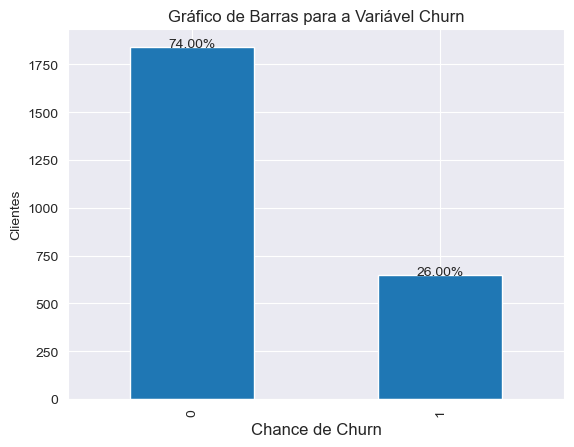

In [ ]:
contagem_churn = df['Churn'].value_counts()
ax = contagem_churn.plot(kind='bar')

porcentagem_churn = (contagem_churn / contagem_churn.sum()) * 100
for i, v in enumerate(contagem_churn):
    ax.text(i, v + 1, f'{porcentagem_churn[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Churn')
plt.xlabel('Churn', fontsize=12)
plt.ylabel('Clientes')

plt.show()

### Nenhuma das variaveis booleanas esta balanceada.

# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


In [54]:
df.describe()

,Idoso,Tempo_como_Cliente,Pagamento_Mensal,Total_Pago,Churn
count,2488.000000,2488.000000,2488.000000,2488.000000,2488.000000
mean,0.161576,32.352090,65.607563,2290.087178,0.260048
std,0.368135,24.636885,27.984700,2264.585643,0.438749
min,0.000000,0.000000,18.400000,18.800000,0.000000
25%,0.000000,8.000000,45.400000,402.337500,0.000000
50%,0.000000,29.000000,65.607563,1402.900000,0.000000
75%,0.000000,56.000000,87.712500,3867.162500,1.000000
max,1.000000,72.000000,118.650000,8564.750000,1.000000


In [55]:
fig = px.box(df, y='Tempo_como_Cliente', title='Box Plot Tempo como Cliente', labels={'Tempo_como_Cliente': 'Tempo como Cliente'})
fig.show()

In [56]:
fig = px.box(df, y='Total_Pago', title='Box Plot Total Pago', labels={'Total_Pago': 'Total pago R$'})
fig.show()

### Apesar de inicialmente me parecer que haviam outliers, conforme minhas análises anteriores cheguei a conclusão que a dostrbuição dos dados aparenta ser real dessa maneira optei por não modificar/remover os dados. 

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

## A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.

## Churn x Idosos

In [ ]:


fig = px.histogram(df, x='Churn', color='Idoso', barmode='stack')

fig.update_layout(title='Relação entre Churn e Clientes Idosos',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Idoso')

In [ ]:
idosos = df[df['Idoso'] == 1]

porcentagem_churn_idosos = (idosos['Churn'] == 1).mean() * 100

porcentagem_n_churn_idosos = (idosos['Churn'] == 0).mean() * 100

print(f"Porcentagem de churn entre clientes idosos: {porcentagem_churn_idosos:.2f}%")
print(f"Porcentagem de não churn entre clientes idosos: {porcentagem_n_churn_idosos:.2f}%")

Porcentagem de churn entre clientes idosos: 38.81%
Porcentagem de não churn entre clientes idosos: 61.19%


### Proporcionalmente é uma taxa de churn bem alta para idosos, mas não é bem o que buscamos ainda.

## Churn x Tipo de serviço de internet

In [72]:
df_grouped = df.groupby(['Churn', 'Servico_Internet']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn ) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Servico_Internet', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Servico_Internet': 'Serviço de Internet'})

fig.update_layout(title='Relação entre Churn e Tipo de serviço de Internet',
                  yaxis_title='Porcentagem',
                  legend_title='Serviço de Internet')

fig.show()

### Aqui podemos concluir que precisamos fazer algo urgente em relação ao clientes que utilizam fibra ótica, a teoria nos diz que é uma conexão mais estavel mas na prática podemos ver que os clientes que utilizam esse serviço tem uma chance de 70% de nos abandonar.

## Churn x Tipo de Contrato

In [76]:
df_grouped = df.groupby(['Churn', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Tipo_Contrato',barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo de Contrato'})

fig.update_layout(title='Relação entre Churn e Tipo de Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo de Contrato')

fig.show()

### Aqui temos certeza de que o churn ocorre praticamente em clientes que utilizam o contrato mensal comparando a clientes com contrato anual e bienal

## Churn x Suporte Tecnico 

In [79]:
df_grouped = df.groupby(['Churn', 'Suporte_Tecnico']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn ) * 100

fig = px.bar(df_grouped, x='Churn', y='percent', color='Suporte_Tecnico', barmode='stack',
             labels={'Churn': 'Churn', 'percent': 'Porcentagem', 'Suporte_Tecnico': 'Suporte Tecnico'})

fig.update_layout(title='Relação entre Churn e Suporte Tecnico',
                  yaxis_title='Porcentagem',
                  legend_title='Suporte Tecnico')

fig.show()

### Caso curioso, clientes que não entraram em contato com nosso suporte nos abandonaram então por aqui podemos concluir que precisa de uma investigação para entender o motivo disso, pois a logica é para ser o oposto pois quem tem problema reclama.

## Churn x Pagamento Mensal

In [82]:
mediana = df.groupby('Churn')['Pagamento_Mensal'].median().reset_index()
fig = px.bar(mediana, x='Churn', y='Pagamento_Mensal',
             title='Média Pagamento Mensal x Churn',
             labels={'Churn': 'Churn', 'Pagamento_Mensal': 'Pagamento Mensal'})

fig.show()

### Clientes com a mediana maior para o valor do plano tendem a nos abandonar mais.

## Realação entre Tempo como Cliente x Total Pago

In [85]:
media_totalpago_por_tempo = df.groupby('Tempo_como_Cliente')['Total_Pago'].mean().reset_index()

fig = px.line(media_totalpago_por_tempo, x='Tempo_como_Cliente', y='Total_Pago',
              title='Relação entre Tempo como Cliente e Total Pago',
              labels={'Tempo_como_Cliente': 'Tempo como Cliente', 'Total_Pago': 'Média Total Pago'})

fig.show()

### Quantos mais tempo o cliente fica na base maior é o total pago pelo mesmo

## Realação entre Tempo como Cliente x Pagamento Mensal

In [86]:
media_pagamentomes_por_tempo = df.groupby('Tempo_como_Cliente')['Pagamento_Mensal'].mean().reset_index()

fig = px.line(media_pagamentomes_por_tempo, x='Tempo_como_Cliente', y='Pagamento_Mensal',
              title='Relação entre Tempo como Cliente e Pagamento Mensal',
              labels={'Tempo_como_Cliente': 'Tempo como Cliente', 'Pagamento_Mensal': 'Média Pagamento Mensal'})

fig.show()

### Podemos ver que há uma variação na média do valor pago, contudo a um aumento no valor pago mensalmente ao decorrer de tempo como cliente.

## Churn x Tempo como Cliente

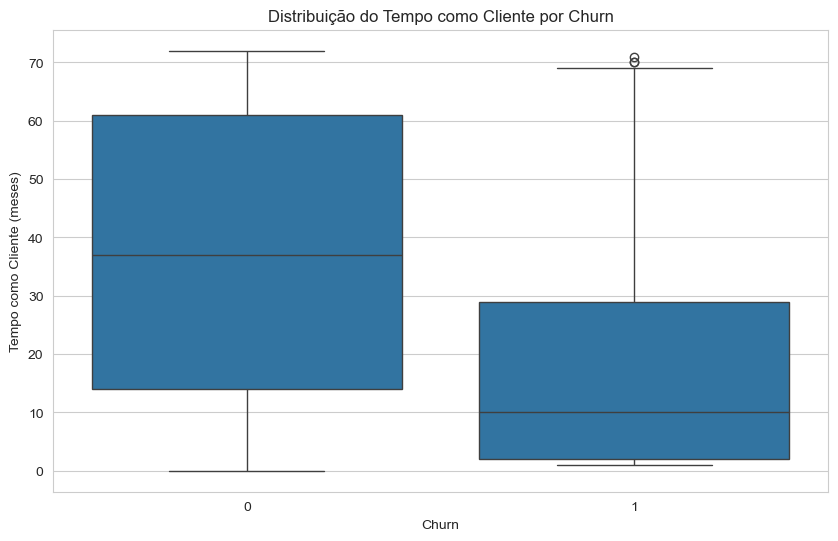

In [91]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='Tempo_como_Cliente')
plt.title("Distribuição do Tempo como Cliente por Churn")
plt.xlabel("Churn")
plt.ylabel("Tempo como Cliente (meses)")
plt.show()

### Aqui podemos concluir que de fato os clientes com menos tempo na base nos abandonam mais vezes, sendo assim talvez seria uma boa ideia oferecer descontos maiores para clientes com menos de 1 ano em troca de fidelidade. 

## B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

### Tipo de serviço de Internet, Suporte Tecnico, Tempo como cliente e Tipo de Contrato.